In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import numpy as np
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# # Install a pip package in the current Jupyter kernel
# !{sys.executable} -m pip install factor_analyzer

from factor_analyzer import FactorAnalyzer
%matplotlib inline



In [2]:
def get_sublist(subDir):
    """ Lists all directories in a main directories of all subjects to create a subject list. Note that this is BIDS format specific (assumes all subject directories begin "sub-xxx". Could be modified.
 Return: subject list """
    sublist = []
    for subnum in np.sort(os.listdir(subDir)): 
        if len(subnum) == 3: 
            if not 'html' in subnum: 
                sublist.append(subnum) 
    return sublist

In [3]:
dicomPath = '/Users/Eichenbaum/HWNI/Experiments/nScout/data/dicom/'
sublist = get_sublist(dicomPath)

In [4]:
# Compute Mean FD for each subject 

mean_FD_arr = np.ones((len(sublist), 2)) * np.nan

for idx, sub in enumerate(sublist):
#     print(sub)
    confound_mat_r1 = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/fmriprep/sub-%s/func/sub-%s_task-rest_run-001_desc-confounds_regressors.tsv' %(sub, sub), delimiter = '\t')
    confound_mat_r2 = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/fmriprep/sub-%s/func/sub-%s_task-rest_run-002_desc-confounds_regressors.tsv' %(sub, sub), delimiter = '\t')
    
    FD_arr_concat = np.concatenate((confound_mat_r1['framewise_displacement'].values[1:], confound_mat_r2['framewise_displacement'].values[1:]))
    mean_FD_arr[idx,:] = [int(sub), np.mean(FD_arr_concat)]
    
# np.savetxt('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/mean_FD_array.txt', mean_FD_arr, fmt='%.10f')

In [5]:
### Loading up all the Brain and Physio data

## 1. Modularity (n 88)
# Sub 001-093: skipping 008 (no data), 019 (no data), 029 (FD thresh), 033 (FD thresh), 056 (no data)
modValsYeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_ModVals_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values

## 2. W/in Network Connectivity (n 88)
# Sub 001-093: skipping 008 (no data), 019 (no data), 029 (FD thresh), 033 (FD thresh), 056 (no data)
wConn_Vis_Yeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_meanFCVals-VisW_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values
wConn_Mot_Yeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_meanFCVals-MotW_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values
wConn_DAN_Yeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_meanFCVals-DANW_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values
wConn_VANSal_Yeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_meanFCVals-VANSalW_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values
wConn_Limb_Yeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_meanFCVals-LimbW_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values
wConn_Cont_Yeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_meanFCVals-ContW_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values
wConn_DMN_Yeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_meanFCVals-DMNW_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values

## 3. Mean Network PC (n 88)
# Sub 001-093: skipping 008 (no data), 019 (no data), 029 (FD thresh), 033 (FD thresh), 056 (no data)
PC_Vis_Yeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_PCVals-Vis_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values
PC_Mot_Yeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_PCVals-Mot_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values
PC_DAN_Yeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_PCVals-DAN_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values
PC_VANSal_Yeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_PCVals-VANSal_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values
PC_Limb_Yeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_PCVals-Limb_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values
PC_Cont_Yeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_PCVals-Cont_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values
PC_DMN_Yeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_PCVals-DMN_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values

## 4. Heart Rate (n 76)
# Sub 009-093: skipping 001-008 (no physio), 19 (no data), 040 (bad physio), 047 (bad physio), 049 (no physio), 051 (no physio), 56 (no data), 063 (bad physio), 071 (bad physio), 077 (bad physio)
HR_mean = np.loadtxt('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/meanHR_arr.txt')
HR_std = np.loadtxt('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/varHR_arr.txt')
HRV_rmssd = np.loadtxt('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/RMSSD_arr.txt')

## 5. Breathing Rate (n 76)
# Sub 009-093: skipping 001-008 (no physio), 19 (no data), 040 (bad physio), 047 (bad physio), 049 (no physio), 051 (no physio), 56 (no data), 063 (bad physio), 071 (bad physio), 077 (bad physio)
BR_mean = np.loadtxt('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/meanBR_arr.txt')
BR_std = np.loadtxt('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/varBR_arr.txt')

## 6. Brain-wide PC (n 88)
# Sub 001-093: skipping 008 (no data), 019 (no data), 029 (FD thresh), 033 (FD thresh), 056 (no data)
PC_wholebrain_Yeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_PCVals-wholeBrainMean_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values

## 7. Global Efficiency (n 88)
# Sub 001-093: skipping 008 (no data), 019 (no data), 029 (FD thresh), 033 (FD thresh), 056 (no data)
GE_wholebrain_Yeo7NetSchaefer = pd.read_csv('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/Louvain_GEVals_FD50excld_Yeo7NetPart_allPos_Schaefer400node.csv', delimiter = ',', header = None).values

## Mean FD ## (n 88)
mean_FD = np.loadtxt('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/mean_FD_array.txt')

### Loading up Behavioral Data
behavDir = '/Users/Eichenbaum/HWNI/Experiments/nScout/data/behavior'

sRT = pd.read_csv('%s/Cal_data_output_n93_032620_Simple-RT.csv' %(behavDir), index_col = 0,  skiprows =[27,31])

rRT = pd.read_csv('%s/Cal_data_output_n93_032620_rRT.csv' %(behavDir), index_col = 0,  skiprows =[27,31])

RA = pd.read_csv('%s/Cal_data_output_n93_032620_Rapid-Adjust.csv' %(behavDir), index_col = 0,  skiprows =[27,31])

pRT = pd.read_csv('%s/Cal_data_output_n93_032620_Paced-RT.csv' %(behavDir), index_col = 0, skiprows =[27,31])

# Alertness from the Questionnaire
alert = np.loadtxt('/Users/Eichenbaum/HWNI/Experiments/nScout/data/behavior/qaire_altertness.txt')

# PacedRT Random vs. Repeat & Confidence in response from the Questionnaire
pRT_qaire = np.loadtxt('/Users/Eichenbaum/HWNI/Experiments/nScout/data/behavior/qaire_pRT_imp-exp_conf.txt')

In [6]:
## Building the behavioral data array

badSubs = ['001', '002', '003', '004', '005',
           '006', '007', '008', '019', '029', 
           '033', '040', '047', '049', '051', 
           '056', '063', '071', '077']

behavior_data_arr = np.ones((74, 18)) * np.nan

includedSubs = ['NaN' for i in range(74)] 
tmp = 0
for idx, sub in enumerate(sublist):
    if sub in badSubs:
        continue

    behavior_data_arr[tmp, 0] = sRT['sRT_corrected_mean'].loc['PARTICIPANT_%s' %(sub)]
    behavior_data_arr[tmp, 1] = sRT['sRT_std'].loc['PARTICIPANT_%s' %(sub)]
    behavior_data_arr[tmp, 2] = rRT['rRT_coefficient'].loc['PARTICIPANT_%s' %(sub)]
    behavior_data_arr[tmp, 3] = rRT['rRT_corrected_mean'].loc['PARTICIPANT_%s' %(sub)]
    behavior_data_arr[tmp, 4] = rRT['rRT_dprime'].loc['PARTICIPANT_%s' %(sub)]
    behavior_data_arr[tmp, 5] = rRT['rRT_std'].loc['PARTICIPANT_%s' %(sub)]
    behavior_data_arr[tmp, 6] = rRT['rRT_stoprate'].loc['PARTICIPANT_%s' %(sub)]
    behavior_data_arr[tmp, 7] = RA['IC_PSE'].loc['PARTICIPANT_%s' %(sub)]
    behavior_data_arr[tmp, 8] = RA['IC_dprime'].loc['PARTICIPANT_%s' %(sub)]
    behavior_data_arr[tmp, 9] = RA['IC_stoprate'].loc['PARTICIPANT_%s' %(sub)]
    behavior_data_arr[tmp, 10] = pRT['ACC_Bin1'].loc['PARTICIPANT_%s' %(sub)]
    behavior_data_arr[tmp, 11] = pRT['ACC_Bin2'].loc['PARTICIPANT_%s' %(sub)]
    behavior_data_arr[tmp, 12] = pRT['ACC_Bin3'].loc['PARTICIPANT_%s' %(sub)]
    behavior_data_arr[tmp, 13] = pRT['ACC_Bin4'].loc['PARTICIPANT_%s' %(sub)]
    behavior_data_arr[tmp, 14] = pRT['RT_mean_Bin1'].loc['PARTICIPANT_%s' %(sub)]
    behavior_data_arr[tmp, 15] = pRT['RT_mean_Bin2'].loc['PARTICIPANT_%s' %(sub)]
    behavior_data_arr[tmp, 16] = pRT['RT_mean_Bin3'].loc['PARTICIPANT_%s' %(sub)]
    behavior_data_arr[tmp, 17] = pRT['RT_mean_Bin4'].loc['PARTICIPANT_%s' %(sub)]
#     behavior_data_arr[tmp, 18] = alert.loc['PARTICIPANT_%s' %(sub)]
        
    includedSubs[tmp] = sub
    tmp+= 1
    
# np.savetxt('/Users/Eichenbaum/Desktop/behav_arr_n74_ALL.txt', behavior_data_arr, fmt='%.10f',)


[30.8 19.1 10.4  8.9  8.5  6.6  3.2  2.8]


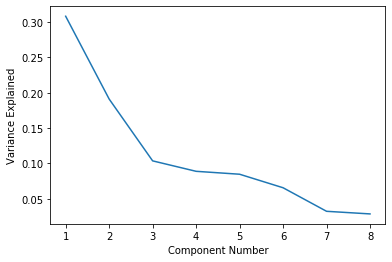

In [7]:
## Running PCA on behavioral data

pca = PCA(n_components=8)
standardizedX = StandardScaler().fit_transform(behavior_data_arr)
# X = behavior_data_arr
pca.fit(standardizedX)

print(np.multiply(np.round(pca.explained_variance_ratio_,3),100))

plt.plot(range(1,9), pca.explained_variance_ratio_)
plt.ylabel('Variance Explained')
plt.xlabel('Component Number')
plt.show()

In [8]:
np.cumsum(np.multiply(np.round(pca.explained_variance_ratio_,3),100))

array([30.8, 49.9, 60.3, 69.2, 77.7, 84.3, 87.5, 90.3])

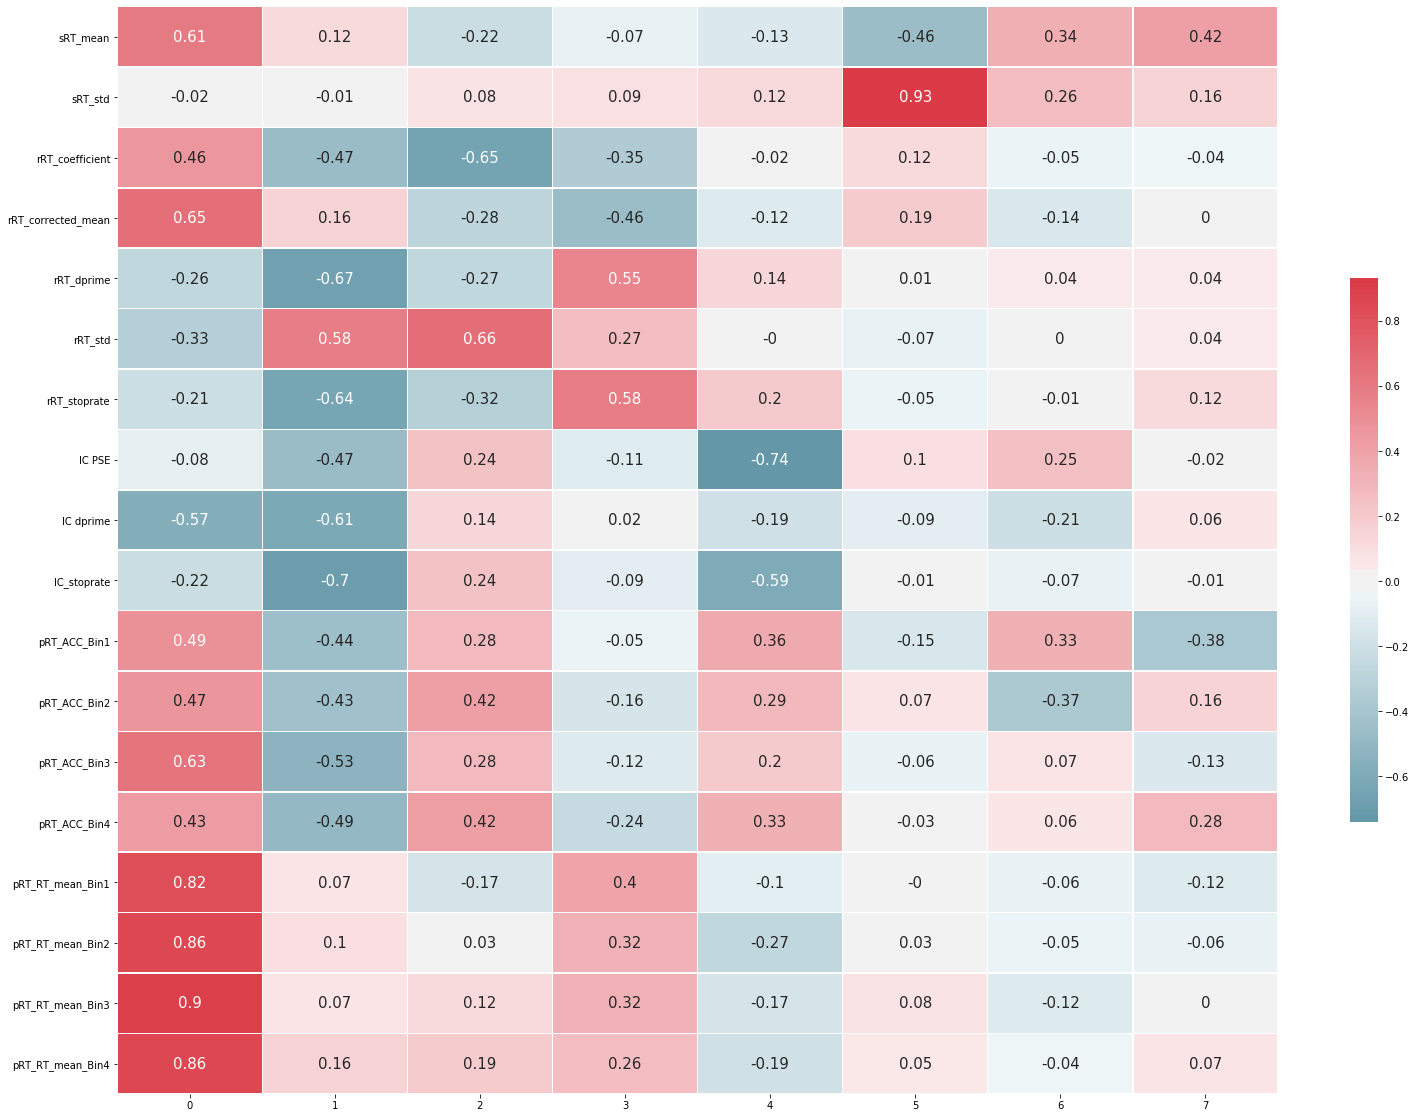

In [9]:
# Build dataframe for behavioral data

names = ['sRT_mean', 'sRT_std',
         'rRT_coefficient', 'rRT_corrected_mean', 'rRT_dprime', 'rRT_std', 'rRT_stoprate',
         'IC PSE', 'IC dprime', 'IC_stoprate', 
         'pRT_ACC_Bin1', 'pRT_ACC_Bin2', 'pRT_ACC_Bin3', 'pRT_ACC_Bin4', 'pRT_RT_mean_Bin1', 'pRT_RT_mean_Bin2', 'pRT_RT_mean_Bin3', 'pRT_RT_mean_Bin4']

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a large random dataset
d = pd.DataFrame(np.round(pca.components_.T * np.sqrt(pca.explained_variance_),5), index=list(names))

# Plot PCA loadings for behavioral data
f, ax = plt.subplots(figsize=(26, 20))
sns.heatmap(np.round(d,2), cmap=cmap, center=0,
             linewidths=.5, cbar_kws={"shrink": .5}, annot = True, annot_kws = {'size': 15})

In [10]:
behav_in_PC_space = np.matmul(standardizedX, np.transpose(pca.components_))

In [11]:
# Subjects that will be excluded in regression (leaves 69 total subjects)
badSubs = ['001', '002', '003', '004', '005',
           '006', '007', '008', '019', '029', 
           '033', '040', '047', '049', '051', 
           '056', '063', '071', '077']

full_data_arr = np.ones((74, 34)) * np.nan
rmssd_data = np.ones((74)) * np.nan
fd_n74_arr = np.ones((74)) * np.nan

# alert_arr = np.ones((74)) * np.nan

tmp = 0
for idx, sub in enumerate(sublist):
    if sub in badSubs:
        continue
    
#     alert_arr[tmp] = alert[np.where(alert[:,0] == int(sub))[0][0],1]
    
    # Behavior in 7-PC space
    full_data_arr[tmp, 0:8] = behav_in_PC_space[tmp,:]
    
    # Modularity
    full_data_arr[tmp, 8] = modValsYeo7NetSchaefer[np.where(modValsYeo7NetSchaefer[:,0] == int(sub))[0][0],1]
    
    ###
    
    # Mean Visual Network w/in FC
    full_data_arr[tmp, 9] = wConn_Vis_Yeo7NetSchaefer[np.where(wConn_Vis_Yeo7NetSchaefer[:,0] == int(sub))[0][0],1]

    # Mean Motor Network w/in FC
    full_data_arr[tmp, 10] = wConn_Mot_Yeo7NetSchaefer[np.where(wConn_Mot_Yeo7NetSchaefer[:,0] == int(sub))[0][0],1]
    
    # Mean DAN Network w/in FC
    full_data_arr[tmp, 11] = wConn_DAN_Yeo7NetSchaefer[np.where(wConn_DAN_Yeo7NetSchaefer[:,0] == int(sub))[0][0],1]
    
    # Mean VANSal Network w/in FC
    full_data_arr[tmp, 12] = wConn_VANSal_Yeo7NetSchaefer[np.where(wConn_VANSal_Yeo7NetSchaefer[:,0] == int(sub))[0][0],1]
    
    # Mean Limbic Network w/in FC
    full_data_arr[tmp, 13] = wConn_Limb_Yeo7NetSchaefer[np.where(wConn_Limb_Yeo7NetSchaefer[:,0] == int(sub))[0][0],1]
    
    # Mean Control Network w/in FC
    full_data_arr[tmp, 14] = wConn_Cont_Yeo7NetSchaefer[np.where(wConn_Cont_Yeo7NetSchaefer[:,0] == int(sub))[0][0],1]

    # Mean DMN Network w/in FC
    full_data_arr[tmp, 15] = wConn_DMN_Yeo7NetSchaefer[np.where(wConn_DMN_Yeo7NetSchaefer[:,0] == int(sub))[0][0],1]

    ###
    
    # Mean Visual Network PC
    full_data_arr[tmp, 16] = PC_Vis_Yeo7NetSchaefer[np.where(PC_Vis_Yeo7NetSchaefer[:,0] == int(sub))[0][0],1]
    
    # Mean Motor Network PC
    full_data_arr[tmp, 17] = PC_Mot_Yeo7NetSchaefer[np.where(PC_Mot_Yeo7NetSchaefer[:,0] == int(sub))[0][0],1]
    
    # Mean DAN Network PC
    full_data_arr[tmp, 18] = PC_DAN_Yeo7NetSchaefer[np.where(PC_DAN_Yeo7NetSchaefer[:,0] == int(sub))[0][0],1]
    
    # Mean VANSal Network PC
    full_data_arr[tmp, 19] = PC_VANSal_Yeo7NetSchaefer[np.where(PC_VANSal_Yeo7NetSchaefer[:,0] == int(sub))[0][0],1]

    # Mean Limbic Network PC
    full_data_arr[tmp, 20] = PC_Limb_Yeo7NetSchaefer[np.where(PC_Limb_Yeo7NetSchaefer[:,0] == int(sub))[0][0],1]
    
    # Mean Control Network PC
    full_data_arr[tmp, 21] = PC_Cont_Yeo7NetSchaefer[np.where(PC_Cont_Yeo7NetSchaefer[:,0] == int(sub))[0][0],1]
    
    # Mean DMN Network PC
    full_data_arr[tmp, 22] = PC_DMN_Yeo7NetSchaefer[np.where(PC_DMN_Yeo7NetSchaefer[:,0] == int(sub))[0][0],1]
    
    ###
    
    # Mean Heart Rate
    full_data_arr[tmp, 23] = HR_mean[np.where(HR_mean[:,0] == int(sub))[0][0],1]
    
    # Stdev Heart Rate
    full_data_arr[tmp, 24] = HR_std[np.where(HR_std[:,0] == int(sub))[0][0],1]
    
    ###
    
    # Mean Breathing Rate
    full_data_arr[tmp, 25] = BR_mean[np.where(BR_mean[:,0] == int(sub))[0][0],1]
    
    # Stdev Breathing Rate
    full_data_arr[tmp, 26] = BR_std[np.where(BR_std[:,0] == int(sub))[0][0],1]

    ###
    
    # Mean Brain-wide PC
    full_data_arr[tmp, 27] = PC_wholebrain_Yeo7NetSchaefer[np.where(PC_wholebrain_Yeo7NetSchaefer[:,0] == int(sub))[0][0],1]
    
    ###
    
    # Mean Brain-wide GE
    full_data_arr[tmp, 28] = GE_wholebrain_Yeo7NetSchaefer[np.where(GE_wholebrain_Yeo7NetSchaefer[:,0] == int(sub))[0][0],1]
    
    # Test for HRV RMSSD
    full_data_arr[tmp, 29] = HRV_rmssd[np.where(HRV_rmssd[:,0] == int(sub))[0][0],1]

    # Mean Framewise Displacement
    full_data_arr[tmp, 30] = mean_FD[np.where(mean_FD[:,0] == int(sub))[0][0],1]
    
    # Alertness 
    full_data_arr[tmp, 31] = alert[np.where(alert[:,0] == int(sub))[0][0],1]
    
    # PacedRT Random vs. Repeat [Binary: 0 = Random, 1 = Repeat]
    full_data_arr[tmp, 32] = pRT_qaire[np.where(pRT_qaire[:,0] == int(sub))[0][0],1]
    
    # PacedRT Confidence 
    full_data_arr[tmp, 33] = pRT_qaire[np.where(pRT_qaire[:,0] == int(sub))[0][0],2]
    
    tmp += 1
    
full_data_arr_standardized = StandardScaler().fit_transform(full_data_arr)

# np.savetxt('/Users/Eichenbaum/Desktop/FullDataArray_allsubs_standardized_PhysioReComp.txt', full_data_arr, fmt='%.10f',)

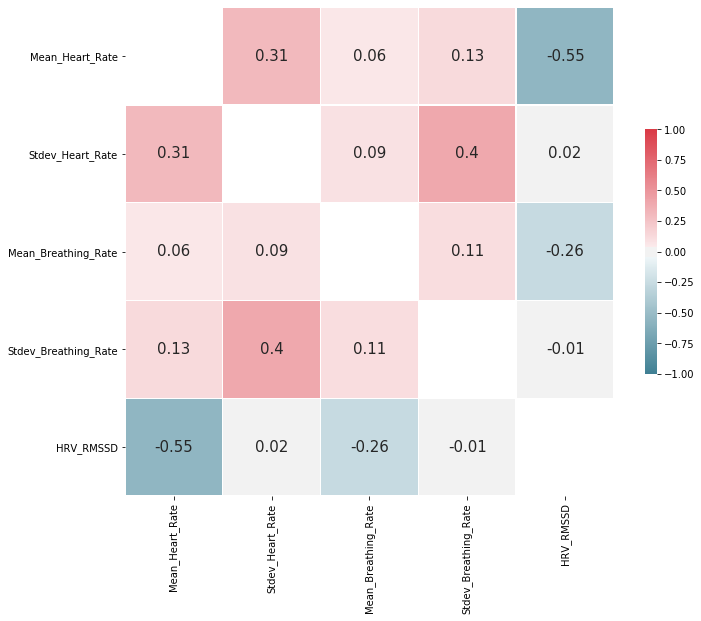

In [17]:
## Similarity of physio metrics

columns = ['Mean_Heart_Rate', 'Stdev_Heart_Rate', 
           'Mean_Breathing_Rate', 'Stdev_Breathing_Rate', 
           'HRV_RMSSD']

index = includedSubs
df = pd.DataFrame(full_data_arr_standardized[:,np.array([23,24,25,26,29])], columns = columns, index = index)

corr = df.corr()
np.fill_diagonal(corr.values, 'NaN')

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(np.round(corr,2), cmap=cmap, vmin = -1, vmax = 1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True, annot_kws = {'size': 15})

[23.6 13.7 10.2  9.5  8.4  7.8  5.7  5.1  4.9  4.   3.7  3.3]
[23.6 37.3 47.5 57.  65.4 73.2 78.9 84.  88.9 92.9 96.6 99.9]


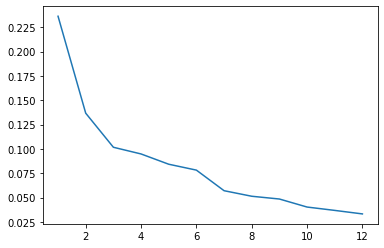

In [14]:
## Run a PCA only on the Modularity (1), Within-Network Func'l Conn (7), and Physio (4) metrics [nTotal = 12]

pca_redXs = PCA(n_components=12)

metArr_redXs = np.array([8,9,10,11,12,13,14,15,23,24,25,26])

standardizedX_redXs = full_data_arr_standardized[:,metArr_redXs]

pca_redXs.fit(standardizedX_redXs)

print(np.multiply(np.round(pca_redXs.explained_variance_ratio_,3),100))

plt.plot(range(1,13), pca_redXs.explained_variance_ratio_)
print(np.cumsum(np.multiply(np.round(pca_redXs.explained_variance_ratio_,3),100)))

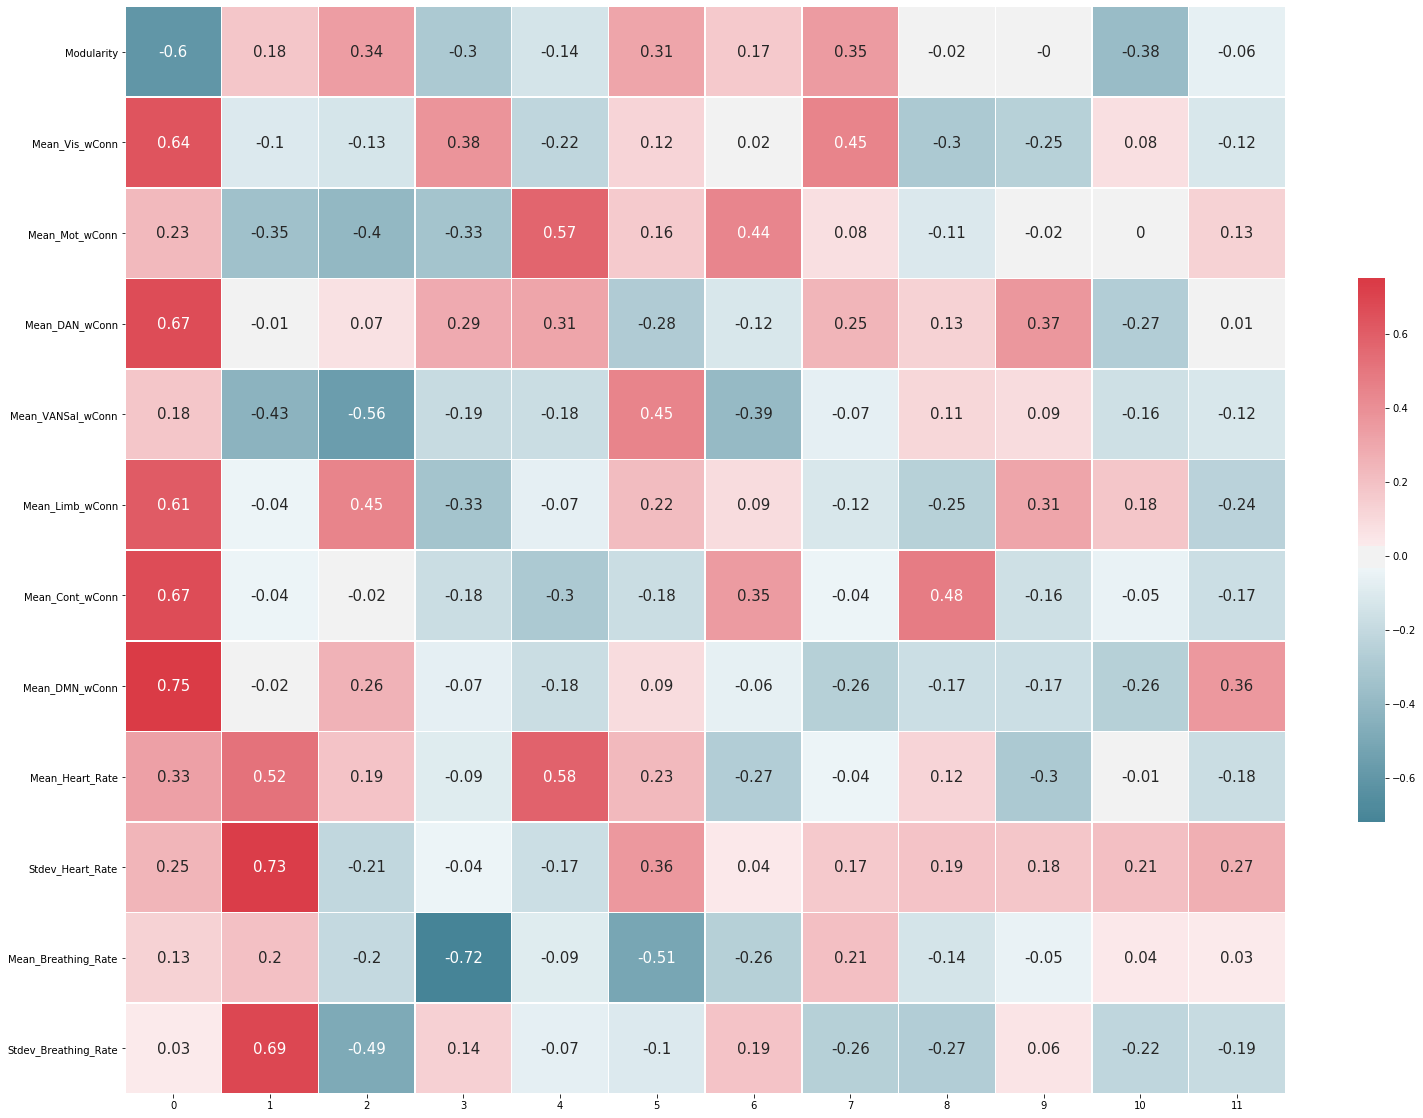

In [15]:
## Plot heatmap of PCA loadings for each brain/bio metric
names = ['Modularity',
         'Mean_Vis_wConn', 'Mean_Mot_wConn', 'Mean_DAN_wConn', 'Mean_VANSal_wConn', 'Mean_Limb_wConn', 'Mean_Cont_wConn', 'Mean_DMN_wConn', 
         'Mean_Heart_Rate', 'Stdev_Heart_Rate', 
         'Mean_Breathing_Rate', 'Stdev_Breathing_Rate']

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a large random dataset
d = pd.DataFrame(np.round(pca_redXs.components_.T * np.sqrt(pca_redXs.explained_variance_),5), index=list(names))

f, ax = plt.subplots(figsize=(26, 20))
sns.heatmap(np.round(d,2), cmap=cmap, center=0,
             linewidths=.5, cbar_kws={"shrink": .5}, annot = True, annot_kws = {'size': 15})